# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv('../data/states_edu.csv')
df.shape
df.head()
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [41]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.head()
np.NaN
type(np.NaN)
df.isna().sum()
df.notna().sum()
df.count()
df.dropna()
df["ENROLL_ALL"].isna().sum()
(df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"]).describe()
((df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"])/df["ENROLL_ALL"]*100).describe()
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HS"])
df[df["ENROLL_ALL"].isna()][['ENROLL_PREK','ENROLL_PRIMARY','ENROLL_HS','ENROLL_ALL_EST']].notna().any()
df[df.ENROLL_ALL_EST.isna()]["ENROLL_ALL"].notna().sum()
((df["ENROLL_ALL"] - df["ENROLL_ALL_EST"])/df["ENROLL_ALL"]).describe()
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df.dropna()




,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,2.080717
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,3.838128
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,1.940807
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,2.139821
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,2.655237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,3.954151
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,4.149538
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,4.187910
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,4.254216


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE* Grade 4 reading

How many years of data are logged in our dataset? 

Text(0.5, 1.0, '4th Grade Reading Score Over Time')

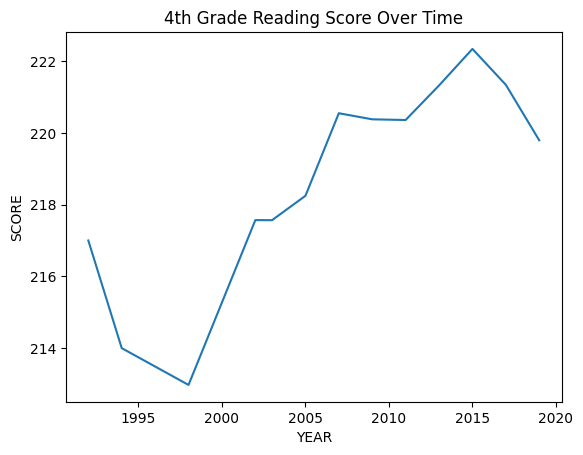

In [24]:
#33 years

df.groupby('YEAR')["AVG_READING_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Reading Score Over Time')

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [46]:
print(df["STATE"].unique())
print(df["STATE"].nunique())

States = df.groupby("STATE")
States
States["AVG_READING_4_SCORE"].mean()
#OHIO


['ALABAMA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'CONNECTICUT'
 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA' 'HAWAII' 'KANSAS'
 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEVADA' 'NEW_MEXICO' 'NEW_YORK'
 'NORTH_CAROLINA' 'OKLAHOMA' 'OREGON' 'RHODE_ISLAND' 'SOUTH_CAROLINA'
 'TENNESSEE' 'TEXAS' 'UTAH' 'VIRGINIA' 'WASHINGTON' 'WEST_VIRGINIA'
 'WISCONSIN' 'WYOMING' 'IDAHO' 'INDIANA' 'MICHIGAN' 'NEBRASKA'
 'NORTH_DAKOTA' 'OHIO' 'PENNSYLVANIA' 'VERMONT' 'ALASKA' 'ILLINOIS' 'IOWA'
 'NEW_HAMPSHIRE' 'NEW_JERSEY' 'SOUTH_DAKOTA' 'NATIONAL' 'DODEA']
53


STATE
ALABAMA                 213.545455
ALASKA                  209.888889
ARIZONA                 210.727273
ARKANSAS                215.545455
CALIFORNIA              209.818182
COLORADO                224.200000
CONNECTICUT             227.909091
DELAWARE                222.363636
DISTRICT_OF_COLUMBIA    199.454545
DODEA                   228.636364
FLORIDA                 221.727273
GEORGIA                 217.454545
HAWAII                  211.636364
IDAHO                   221.200000
ILLINOIS                218.666667
INDIANA                 222.600000
IOWA                    222.444444
KANSAS                  222.000000
KENTUCKY                222.363636
LOUISIANA               208.454545
MAINE                   223.818182
MARYLAND                222.727273
MASSACHUSETTS           232.454545
MICHIGAN                218.200000
MINNESOTA               223.400000
MISSISSIPPI             209.090909
MISSOURI                220.909091
MONTANA                 224.181818
NATIONAL      

Find the average for your chosen test across all states in 2019

In [75]:


df[df['YEAR'] == 2019]['AVG_READING_4_SCORE'].mean()




    

219.79245283018867

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [85]:
max_test_scores = df.groupby('STATE')['AVG_READING_4_SCORE'].max()


print(max_test_scores)

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   226.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [83]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,2.080717
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,3.838128
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,1.940807
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,2.139821
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,2.655237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,3.954151
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,4.149538
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,4.187910
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,4.254216


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**
I made the changes I did because I feel like the more funds availible per student should lead to a higher test score because they have access to better and more resources 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Reading Score')

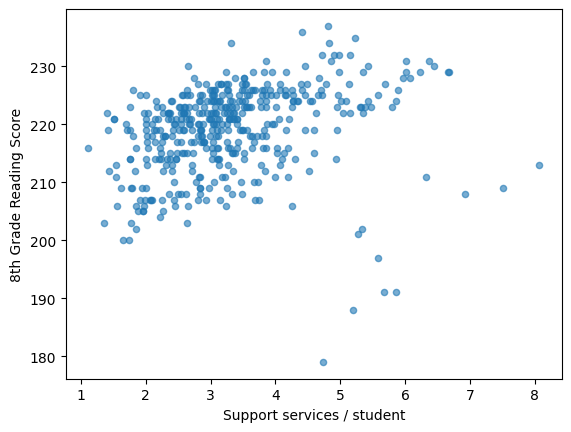

In [86]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Support services / student')
plt.ylabel('8th Grade Reading Score')

**<CAPTION FOR VIZ 1>** does suppor tservice per student correlate to a higher score

**Visualization 2**

Text(0.5, 1.0, 'Correlation between Math and Reading Scores at 4th grade level')

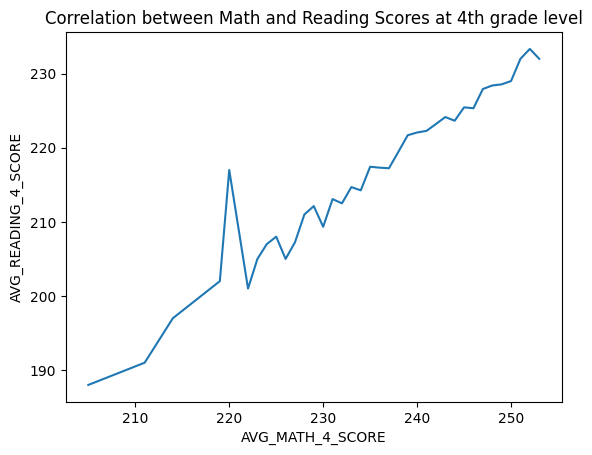

In [88]:
df.groupby('AVG_MATH_4_SCORE')["AVG_READING_4_SCORE"].mean().plot()
plt.ylabel('AVG_READING_4_SCORE')
plt.title('Correlation between Math and Reading Scores at 4th grade level')

**<CAPTION FOR VIZ 2>** does math score have any correlation with reading score

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
 X = df[['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','AVG_MATH_4_SCORE','ENROLL_PRIMARY']].dropna()
 y = df.loc[X.index]['AVG_READING_4_SCORE'] 
y.fillna(y.median(), inplace=True)

In [123]:
 #X_train, X_test, y_train, y_test = train_test_split(
     # X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)



<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [124]:
from sklearn.linear_model import LinearRegression

In [126]:
y_pred = model.predict(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [131]:
model.score(X_test, y_test)
#print(model.intercept_)
#print(model.coef_)

0.688817224683876

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

0.688817224683876

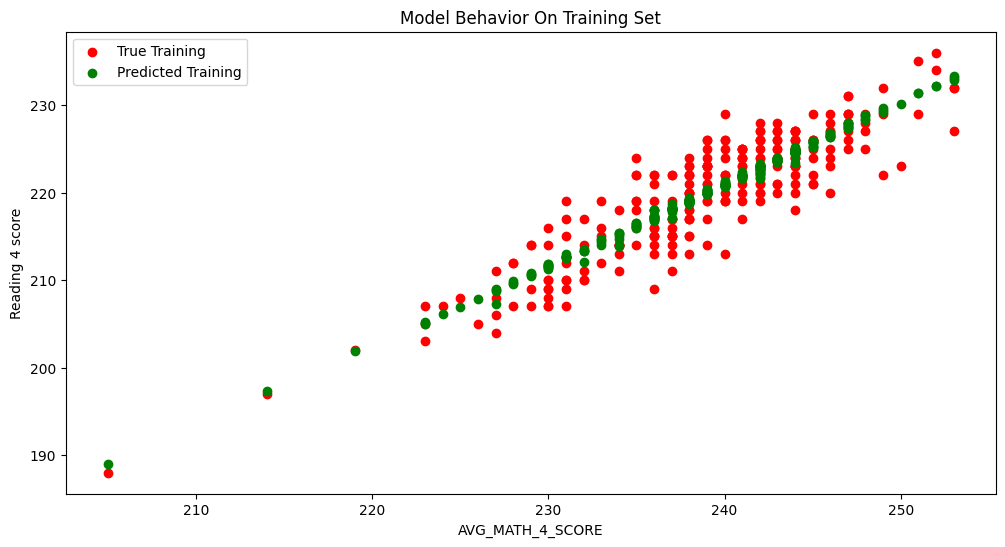

In [137]:
 col_name = 'AVG_MATH_4_SCORE'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_train[col_name], y_train, color = "red")
 plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

 plt.legend(['True Training','Predicted Training'])
 plt.xlabel(col_name)
 plt.ylabel('Reading 4 score')
 plt.title("Model Behavior On Training Set")

0.688817224683876

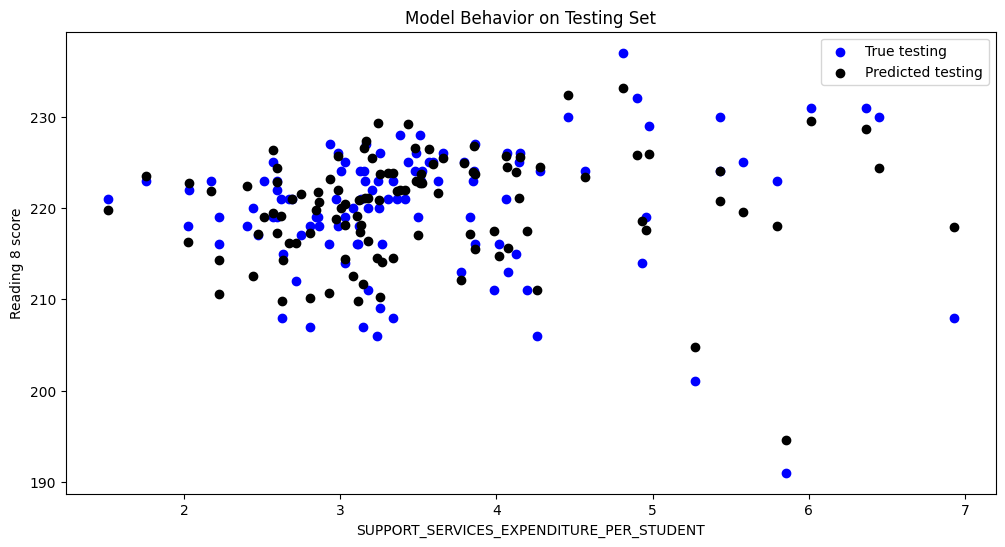

In [138]:
 col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_test[col_name], y_test, color = "blue")
 plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

 plt.legend(['True testing','Predicted testing'])
 plt.xlabel(col_name)
 plt.ylabel('Reading 8 score')
 plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

    The model predicts a very linear correlation between reading score in 4th grade and math score in 4th grade. There are values that fall above and below the regression line however the data follows the general trend of the predicted data. This seems to prove there is a fairly strong correlation between math scores in 4th grade and reading scores. The data points in the second graph are much more random and seem to lack a strong correlation especially past the 5 mark on teh x-axis. This seems to prove there is not as strong of a correlation between funds availible per student and reading score in the fourth grade.  